# MLR - Feature Scaling

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

In [52]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X_train = np.c_[x, x**2, x**3]   #<-- added engineered feature
y_train = y

In [53]:
def model(X, w, b):
    # y = np.dot(X, w) + b
    y = X @ w + b
    return y

In [54]:
def compute_cost(X, y, w, b): 
    # J function
    m = X.shape[0]
    e = y - model(X, w, b) # (w*x+b)
    total_cost = (1/(2* m)) * sum(e**2)
    return total_cost


In [55]:
b_init = 0
w_init = np.array([0.08, 0.54, 0.03]) # np.zeros(X_train.shape[1])

In [56]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 106.27298500000005


In [57]:
def compute_gradient(X, y, w, b): 
    # Number of training examples
    m = X.shape[0] 
    e = model(X, w, b)- y
    dw = (1/m) * X.T @ e
    # dw = (1/m) * np.dot(e, X)
    db = (1/m) * e
    dw = sum(dw)
    db = sum(db)
    return dw, db

In [58]:
from copy import deepcopy
def gradient_descent(x, y, w_in = 0, b_in = 0, alpha = 1, num_iters = 100):
    
    w = deepcopy(w_in)
    b = deepcopy(b_in)
    p_history = [(w, b)]
    cost_history  = [compute_cost(x, y, w, b)] # J
    
    for i in range(num_iters):
        dw, db = compute_gradient(x, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        p_history.append((w, b))
        cost_history.append(compute_cost(x, y, w, b))
        if i%100 == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_dw: {dw}, dj_db: {db}  ",
                  f"w: {w}, b:{b}")

    return w, b, p_history, cost_history


In [59]:
def zscore_normalize_features(X):
    m = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-m) / sigma
    return X_norm


In [60]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0
# some gradient descent settings
iterations = 100
tmp_alpha = 1.0e-8
# run gradient descent
w_final, b_final, p_history, cost_history = gradient_descent(X_train ,y_train, initial_w, initial_b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")


Iteration    0: Cost 1.18e+04  dj_dw: -486603.30000000005, dj_db: -123.5   w: [0.00486603 0.00486603 0.00486603], b:1.235e-06
(w,b) found by gradient descent: ([0.05641582 0.05641582 0.05641582],2.683037034188635e-05)


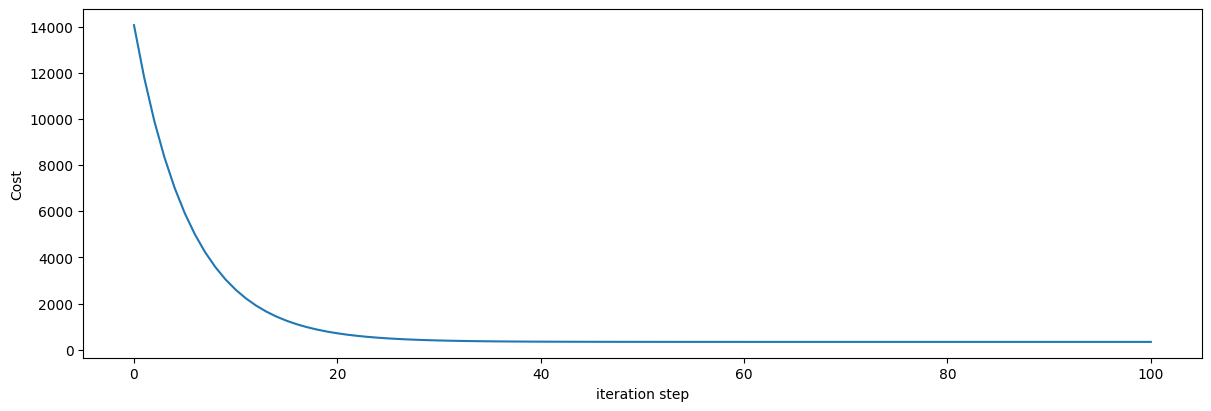

In [61]:
# plot cost versus iteration  
fig, ax1= plt.subplots(constrained_layout=True, figsize=(12,4))
ax1.plot(cost_history)
ax1.set_ylabel('Cost')           
ax1.set_xlabel('iteration step') 
plt.show()

In [71]:
# nomalize
X_N_train = zscore_normalize_features(X_train)

# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0
# some gradient descent settings
iterations = 100
tmp_alpha = 1.0e-1
# run gradient descent
w_final, b_final, p_history, cost_history = gradient_descent(X_N_train ,y_train, initial_w, initial_b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")


Iteration    0: Cost 6.29e+03  dj_dw: -334.93768002778296, dj_db: -123.5   w: [33.493768 33.493768 33.493768], b:12.350000000000001
(w,b) found by gradient descent: ([38.38345625 38.38345625 38.38345625],123.49671966723739)


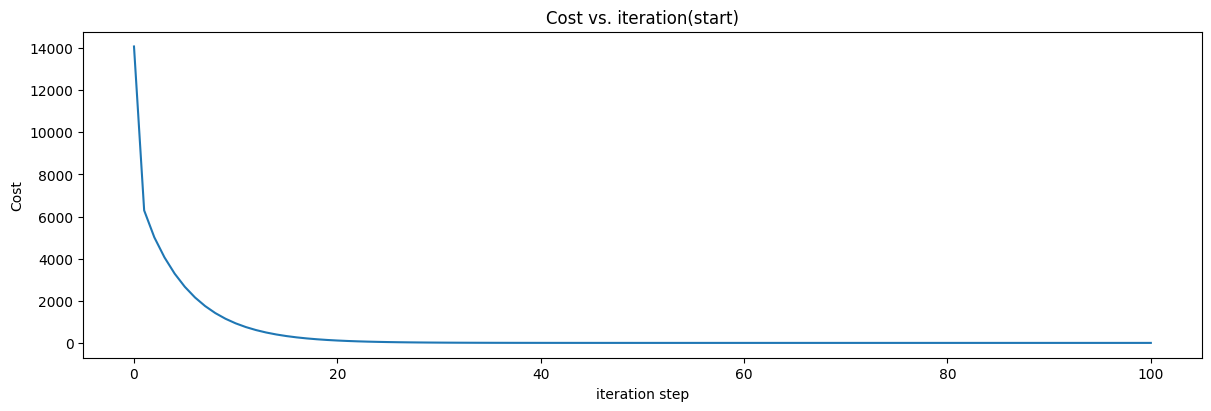

In [72]:
# plot cost versus iteration  
fig2, ax3 = plt.subplots(constrained_layout=True, figsize=(12,4))
ax3.plot(cost_history)
ax3.set_title("Cost vs. iteration(start)")
ax3.set_ylabel('Cost') 
ax3.set_xlabel('iteration step')  
plt.show()

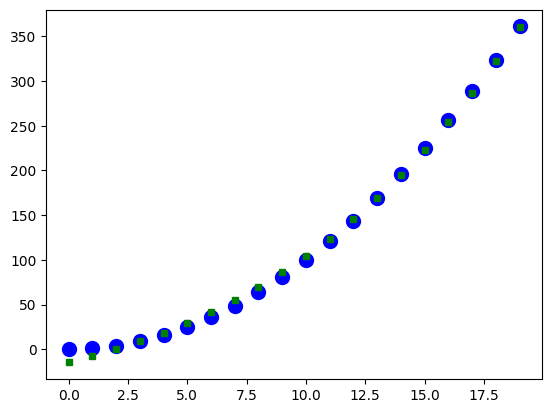

In [73]:
y_pred = model(X_N_train, w_final, b_final)
fig3, ax33 = plt.subplots()
ax33.plot(x, y, 'bo', markersize=10)
ax33.plot(x, y_pred, 'gs', markersize=5)
